<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/intro_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving clean_unemployment.csv to clean_unemployment.csv


In [ ]:
unemployment = pd.read_csv('/content/clean_unemployment.csv')
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [ ]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [ ]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

In [ ]:
# Count the values associated with each continent in unemployment
print(unemployment["continent"].value_counts())

Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: continent, dtype: int64


Did you know that there are 23 countries in North America, which includes countries in the Caribbean and Central America? You may have noticed that North America has 18 data points in the unemployment DataFrame, so we are missing information on a few of the countries from our dataset.

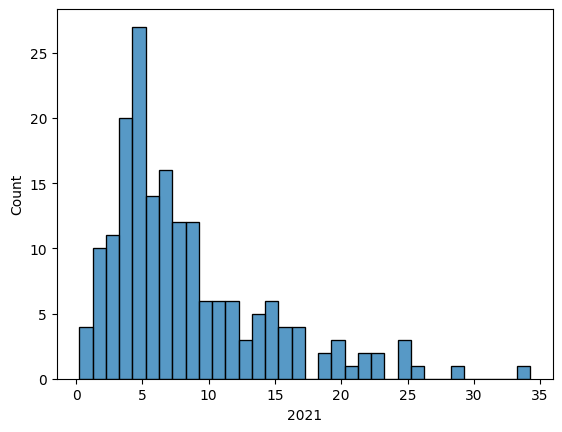

In [ ]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment,x="2021",binwidth=1)
plt.show()

it looks like 2021 unemployment hovered around 3% to 8% for most countries in the dataset, but a few countries experienced very high unemployment of 20% to 35%.

# **Validating continent**

In [ ]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

You validated categorical data and used your .isin() validation to then exclude data that you weren't interested in! Filtering out data that you don't need at the start of your EDA process is a great way to organize yourself for the exploration yet to come.

0.26 33.56


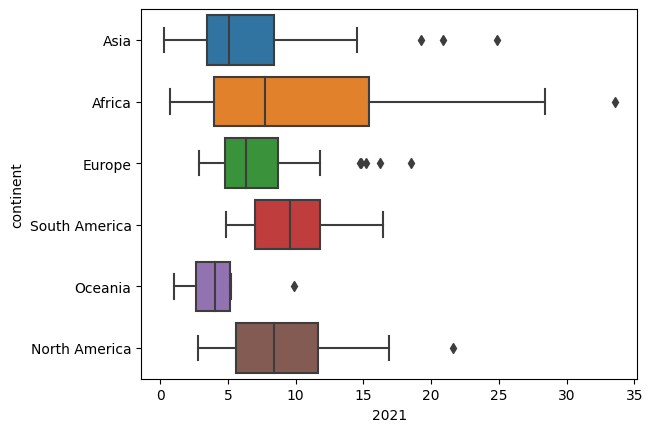

In [ ]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment["2021"].min(), unemployment["2021"].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment,x="2021", y="continent")
plt.show()

Notice how different the ranges in unemployment are between continents. For example, Africa's 50th percentile is lower than that of North America, but the range is much wider.

# **Data summarization**

In [ ]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(["mean","std"]))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


<ipython-input-11-67b250622a2d>:2: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.agg(["mean","std"]))


In [ ]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby("continent").agg(["mean","std"]))

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

<ipython-input-12-0def77e347eb>:2: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby("continent").agg(["mean","std"]))


This data is well-summarized, but it's a little long. What if you wanted to focus on a summary for just one year and make it more readable?

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ("2021","mean"),
    # Create the std_rate_2021 column
    std_rate_2021 = ("2021","std"),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


Average 2021 unemployment varied widely by continent, and so did the unemployment within those continents.

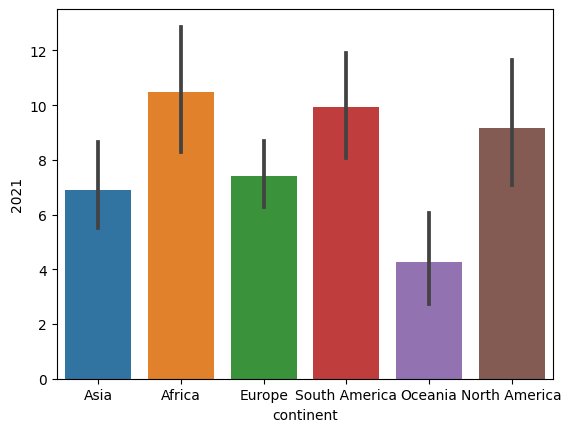

In [ ]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment,x="continent",y="2021")
plt.show()

Way to go. While Europe has higher average unemployment than Asia, it also has a smaller confidence interval for that average, so the average value is more reliable.